### Importa√ß√£o dos dados



In [43]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. An√°lise do faturamento


In [44]:
import pandas as pd

Analise

/tmp/ipython-input-3918123926.py:75: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3918123926.py:75: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-3918123926.py:75: UserWarning: Glyph 127849 (\N{DOUGHNUT}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127849 (\N{DOUGHNUT}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


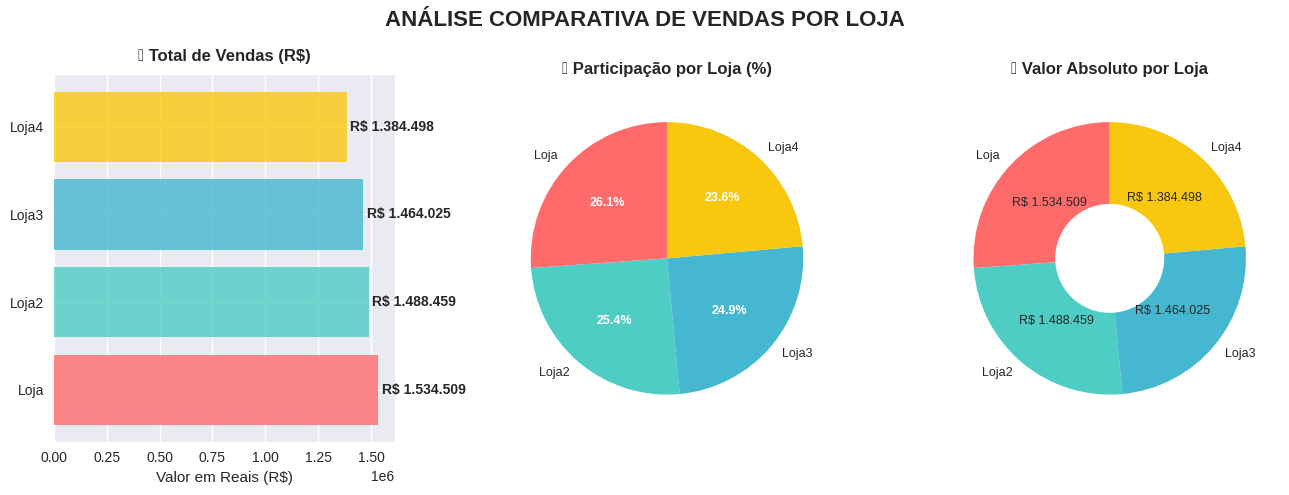

In [45]:
import matplotlib.pyplot as plt
import numpy as np

#
bases = {
    "Loja": loja,
    "Loja2": loja2,
    "Loja3": loja3,
    "Loja4": loja4
}

resultados = []
for nome_loja, df in bases.items():
    try:
        df['Pre√ßo'] = pd.to_numeric(df['Pre√ßo'].astype(str).str.replace(',', '.'), errors='coerce')
        resultados.append({
            "Loja": nome_loja,
            "Total Vendido (R$)": df['Pre√ßo'].sum(),
            "M√©dia por Venda (R$)": df['Pre√ßo'].mean(),
            "Qtde de Vendas": df['Pre√ßo'].count()
        })
    except KeyError:
        print(f"Erro: Coluna 'Pre√ßo' n√£o encontrada na base {nome_loja}")

resultado_final = pd.DataFrame(resultados)
resultado_final['Total Gr√°fico'] = resultado_final['Total Vendido (R$)']

#
plt.style.use('seaborn-v0_8')
cores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F9C80E']

# FIGURA COM 3 SUBPLOTS (1300x500px)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 5))
fig.suptitle('AN√ÅLISE COMPARATIVA DE VENDAS POR LOJA', fontsize=16, fontweight='bold', y=0.98)

# --- GR√ÅFICO 1: BARRAS HORIZONTAIS ---
bars = ax1.barh(resultado_final['Loja'], resultado_final['Total Gr√°fico'], color=cores, alpha=0.8)
ax1.set_title('üìä Total de Vendas (R$)', fontsize=12, fontweight='bold', pad=10)
ax1.set_xlabel('Valor em Reais (R$)')
ax1.tick_params(axis='y')

# Adiciona valores nas barras
for bar in bars:
    width = bar.get_width()
    ax1.text(width + max(resultado_final['Total Gr√°fico'])*0.01,
             bar.get_y() + bar.get_height()/2,
             f'R$ {width:,.0f}'.replace(',', '.'),
             ha='left', va='center', fontweight='bold')

# --- GR√ÅFICO 2: PIZZA (PROPOR√á√ÉO) ---
wedges, texts, autotexts = ax2.pie(resultado_final['Total Gr√°fico'],
                                  labels=resultado_final['Loja'],
                                  colors=cores,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  textprops={'fontsize': 9})
ax2.set_title('ü•ß Participa√ß√£o por Loja (%)', fontsize=12, fontweight='bold', pad=10)

# Melhora a legibilidade
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# --- GR√ÅFICO 3: ROSCA (DOUGHNUT) ---
wedges, texts, autotexts = ax3.pie(resultado_final['Total Gr√°fico'],
                                  labels=resultado_final['Loja'],
                                  colors=cores,
                                  autopct=lambda p: f'R$ {p * sum(resultado_final["Total Gr√°fico"])/100:,.0f}'.replace(',', '.'),
                                  startangle=90,
                                  wedgeprops={'width': 0.6},
                                  textprops={'fontsize': 9})
ax3.set_title('üç© Valor Absoluto por Loja', fontsize=12, fontweight='bold', pad=10)

# Ajustes finais
plt.tight_layout()
plt.subplots_adjust(top=0.85, wspace=0.3)
plt.show()

# --- B√îNUS: GR√ÅFICO DE LINHAS PARA TEND√äNCIA (se tiver dados temporais) ---
# Se seus dados tiverem coluna de data, descomente:
# resultado_final.plot(x='Loja', y='Total Gr√°fico', marker='o', linestyle='-', linewidth=2, markersize=8)
# plt.title('Tend√™ncia de Vendas por Loja')
# plt.ylabel('Total de Vendas (R$)')
# plt.xticks(rotation=45)
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

# 2. Vendas por Categoria


In [56]:
# Lista com todas as DataFrames de lojas
todas_as_lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ["Loja", "Loja2", "Loja3", "Loja4"]

# Calcula para cada loja e armazena resultados
resultados = []
for df, nome in zip(todas_as_lojas, nomes_lojas):
    contagem = df['Categoria do Produto'].value_counts().reset_index()
    contagem.columns = ['Categoria', 'Quantidade']
    contagem['Loja'] = nome  # Adiciona coluna com nome da loja
    resultados.append(contagem)

# Combina todos os resultados em um √∫nico DataFrame
resultado_final = pd.concat(resultados, ignore_index=True)

# Formata a sa√≠da
print("RESUMO GERAL:")
print(resultado_final.pivot(index='Categoria', columns='Loja', values='Quantidade').fillna(0))

RESUMO GERAL:
Loja                   Loja  Loja2  Loja3  Loja4
Categoria                                       
brinquedos              338    313    315    338
eletrodomesticos        254    305    278    254
eletronicos             451    422    451    451
esporte e lazer         277    275    277    277
instrumentos musicais   170    224    177    170
livros                  187    197    185    187
moveis                  480    442    499    480
utilidades domesticas   201    181    177    201


/tmp/ipython-input-2960281332.py:59: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2960281332.py:59: UserWarning: Glyph 129374 (\N{PANCAKES}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2960281332.py:59: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129374 (\N{PANCAKES}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


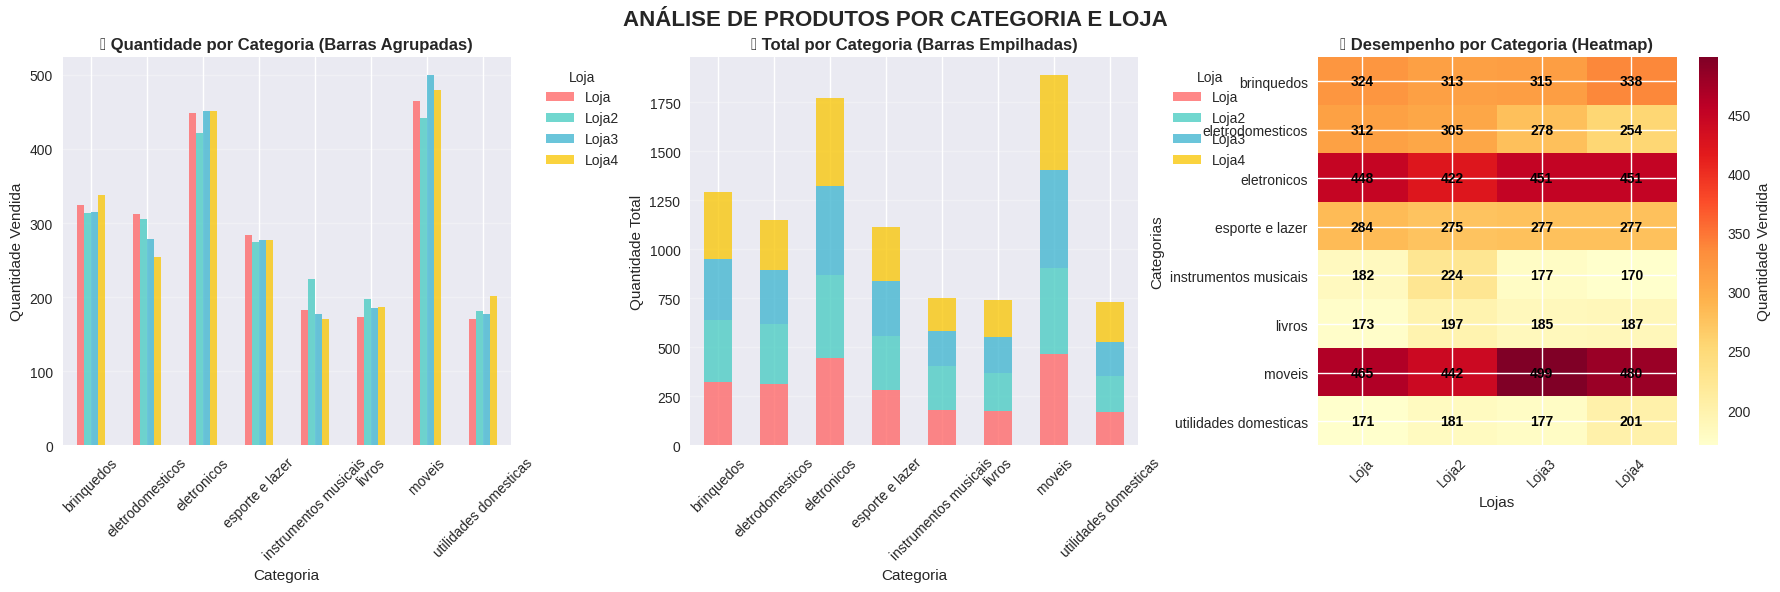

/tmp/ipython-input-2960281332.py:76: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


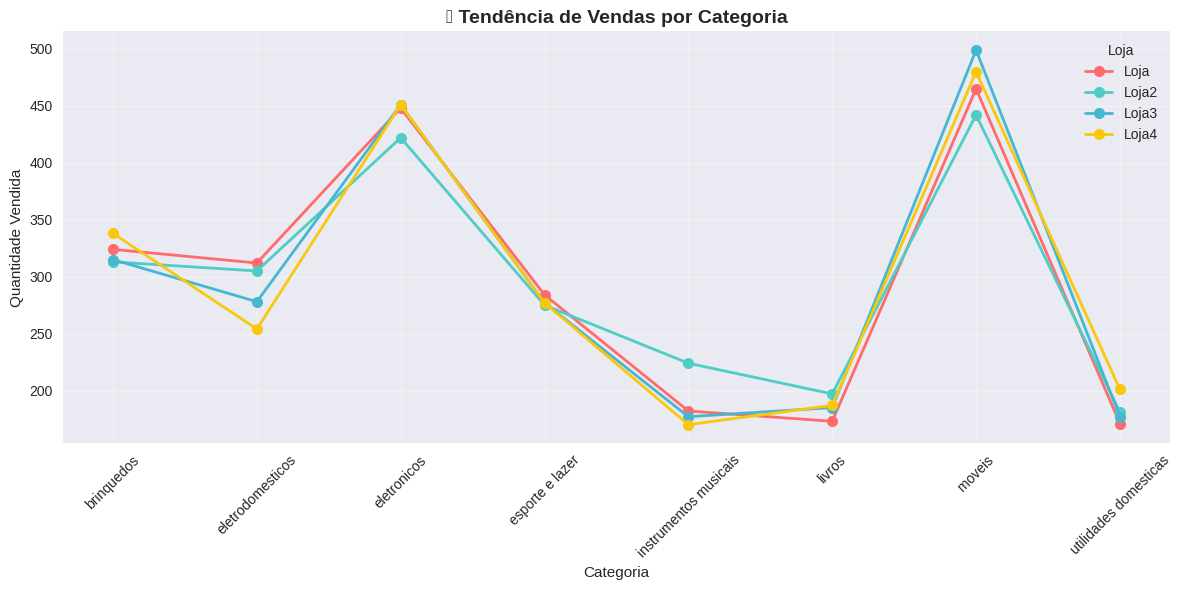

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#
#

# Criar pivot table para os gr√°ficos
pivot_data = resultado_final.pivot(index='Categoria', columns='Loja', values='Quantidade')

# Configura√ß√£o do estilo
plt.style.use('seaborn-v0_8')
cores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F9C80E', '#FFA07A', '#20B2AA']

# FIGURA COM 3 SUBPLOTS
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('AN√ÅLISE DE PRODUTOS POR CATEGORIA E LOJA', fontsize=16, fontweight='bold', y=0.98)

# --- GR√ÅFICO 1: BARRAS AGRUPADAS (original) ---
pivot_data.plot(kind='bar', ax=ax1, color=cores[:len(pivot_data.columns)], alpha=0.8)
ax1.set_title('üìä Quantidade por Categoria (Barras Agrupadas)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Categoria')
ax1.set_ylabel('Quantidade Vendida')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(axis='y', alpha=0.3)

# --- GR√ÅFICO 2: BARRAS EMPILHADAS ---
pivot_data.plot(kind='bar', ax=ax2, stacked=True, color=cores[:len(pivot_data.columns)], alpha=0.8)
ax2.set_title('ü•û Total por Categoria (Barras Empilhadas)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Categoria')
ax2.set_ylabel('Quantidade Total')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(axis='y', alpha=0.3)

# --- GR√ÅFICO 3: HEATMAP/HISTOGRAMA DE CALOR ---
im = ax3.imshow(pivot_data.values, cmap='YlOrRd', aspect='auto', interpolation='nearest')
ax3.set_title('üî• Desempenho por Categoria (Heatmap)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Lojas')
ax3.set_ylabel('Categorias')

# Configurar eixos do heatmap
ax3.set_xticks(range(len(pivot_data.columns)))
ax3.set_xticklabels(pivot_data.columns, rotation=45)
ax3.set_yticks(range(len(pivot_data.index)))
ax3.set_yticklabels(pivot_data.index)

# Adicionar valores nas c√©lulas do heatmap
for i in range(len(pivot_data.index)):
    for j in range(len(pivot_data.columns)):
        text = ax3.text(j, i, pivot_data.values[i, j],
                       ha="center", va="center", color="black", fontweight='bold')

# Barra de cores para o heatmap
plt.colorbar(im, ax=ax3, label='Quantidade Vendida')

# Ajustes
plt.tight_layout()
plt.subplots_adjust(top=0.90, wspace=0.4)
plt.show()

# --- B√îNUS: GR√ÅFICO 4 - LINHAS PARA TEND√äNCIAS ---
plt.figure(figsize=(12, 6))
for i, loja in enumerate(pivot_data.columns):
    plt.plot(pivot_data.index, pivot_data[loja],
             marker='o', linewidth=2, markersize=8,
             label=loja, color=cores[i])

plt.title('üìà Tend√™ncia de Vendas por Categoria', fontsize=14, fontweight='bold')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.legend(title='Loja')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. M√©dia de Avalia√ß√£o das Lojas

üîç VERIFICA√á√ÉO FINAL DAS BASES:
----------------------------------------
‚úÖ Loja: DataFrame v√°lido (2358 registros)
‚úÖ Loja2: DataFrame v√°lido (2359 registros)
‚úÖ Loja3: DataFrame v√°lido (2359 registros)
‚úÖ Loja4: DataFrame v√°lido (2358 registros)
----------------------------------------
‚úÖ Loja: 4.00 estrelas (2358 avalia√ß√µes)
‚úÖ Loja2: 4.04 estrelas (2359 avalia√ß√µes)
‚úÖ Loja3: 4.05 estrelas (2359 avalia√ß√µes)
‚úÖ Loja4: 4.00 estrelas (2358 avalia√ß√µes)


/tmp/ipython-input-619709077.py:95: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-619709077.py:95: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-619709077.py:95: UserWarning: Glyph 127849 (\N{DOUGHNUT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127849 (\N{DOUGHNUT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


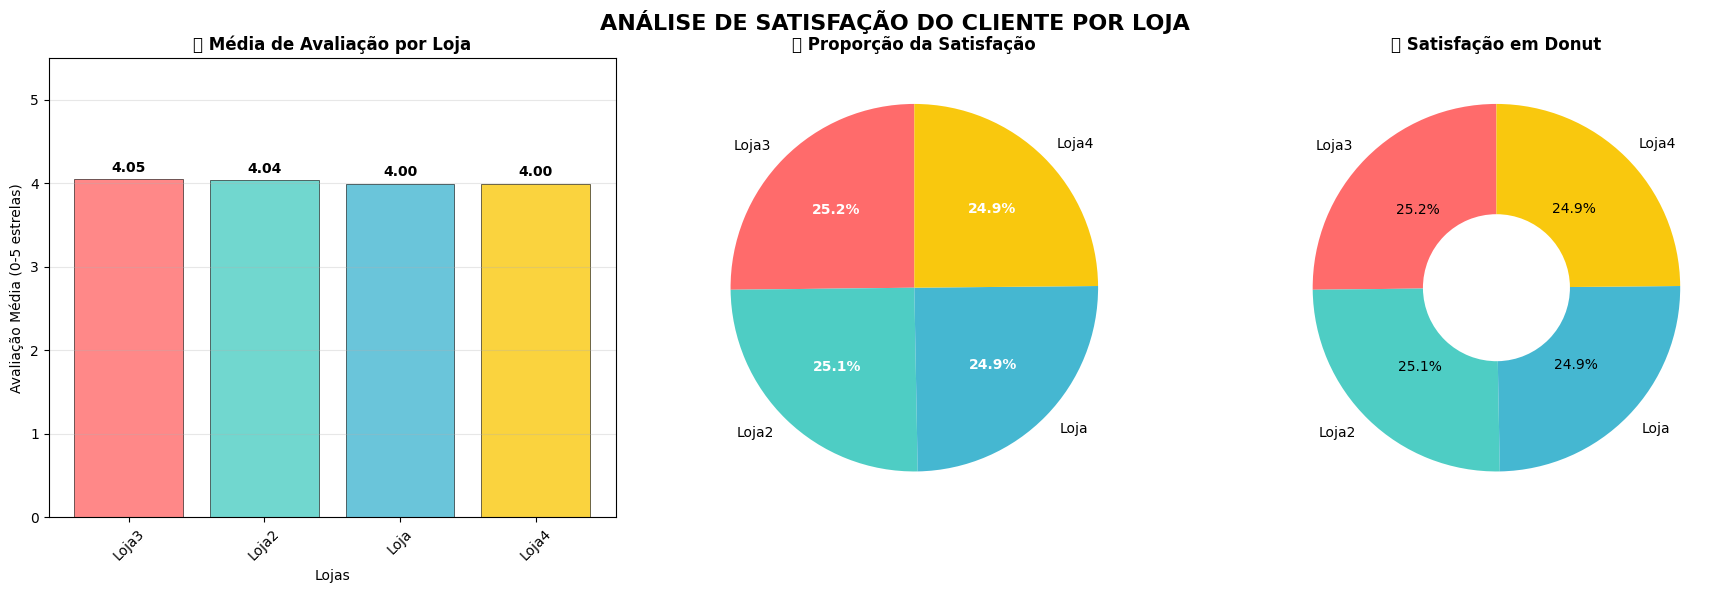


RELAT√ìRIO FINAL - AVALIA√á√ïES POR LOJA
üè™ Loja3: 4.05 estrelas (2359 avalia√ß√µes)
üè™ Loja2: 4.04 estrelas (2359 avalia√ß√µes)
üè™ Loja: 4.00 estrelas (2358 avalia√ß√µes)
üè™ Loja4: 4.00 estrelas (2358 avalia√ß√µes)

üìà Melhor avalia√ß√£o: 4.05 estrelas
üìâ Pior avalia√ß√£o: 4.00 estrelas
üìä Diferen√ßa: 0.05 estrelas

B√îNUS: CORRELA√á√ÉO ENTRE FRETE E AVALIA√á√ÉO


/tmp/ipython-input-619709077.py:144: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


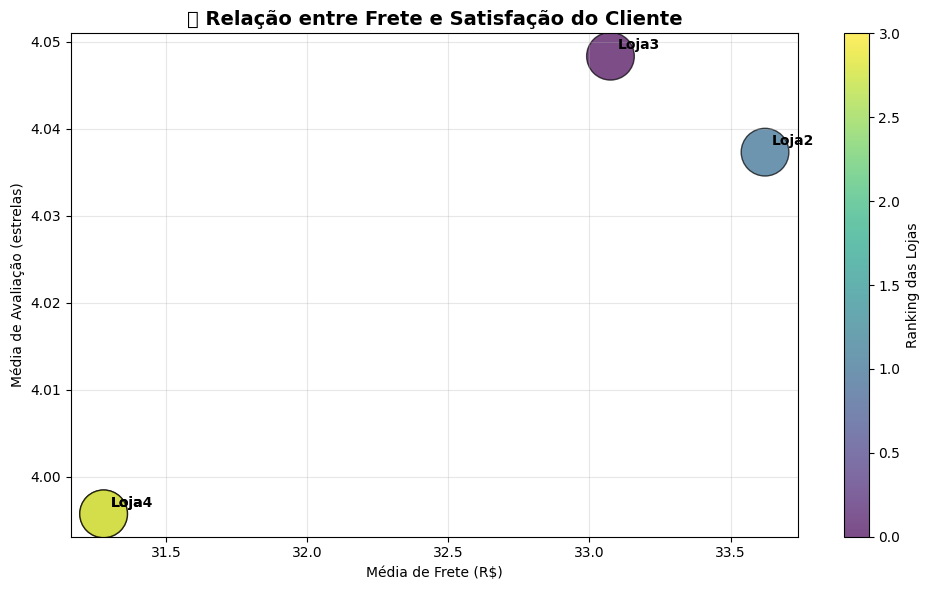

In [58]:
#
loja = loja4
# Dicion√°rio com bases corrigidas
bases = {
    "Loja": loja,        # AGORA CORRIGIDO
    "Loja2": loja2,
    "Loja3": loja3,
    "Loja4": loja4
}

# VERIFICA√á√ÉO FINAL
print("üîç VERIFICA√á√ÉO FINAL DAS BASES:")
print("-" * 40)
for nome, df in bases.items():
    if isinstance(df, pd.DataFrame) and not df.empty:
        print(f"‚úÖ {nome}: DataFrame v√°lido ({len(df)} registros)")
    else:
        print(f"‚ùå {nome}: Inv√°lido ou vazio")

print("-" * 40)

# 1. CALCULAR M√âDIAS DE AVALIA√á√ÉO PARA CADA LOJA
resultados_avaliacao = []
for nome_loja, df in bases.items():
    try:
        if not df.empty and 'Avalia√ß√£o da compra' in df.columns:
            # Converte para num√©rico se necess√°rio
            df['Avalia√ß√£o da compra'] = pd.to_numeric(df['Avalia√ß√£o da compra'], errors='coerce')
            media_avaliacao = df['Avalia√ß√£o da compra'].mean()
            total_avaliacoes = df['Avalia√ß√£o da compra'].count()

            resultados_avaliacao.append({
                "Loja": nome_loja,
                "M√©dia de Avalia√ß√£o": media_avaliacao,
                "Total de Avalia√ß√µes": total_avaliacoes
            })
            print(f"‚úÖ {nome_loja}: {media_avaliacao:.2f} estrelas ({total_avaliacoes} avalia√ß√µes)")
        else:
            print(f"‚ö†Ô∏è  {nome_loja}: Coluna 'Avalia√ß√£o da compra' n√£o encontrada")
    except Exception as e:
        print(f"üí• Erro em {nome_loja}: {str(e)}")

# Criar DataFrame com resultados
if resultados_avaliacao:
    resultado_avaliacao_final = pd.DataFrame(resultados_avaliacao)
    resultado_avaliacao_final = resultado_avaliacao_final.sort_values(by='M√©dia de Avalia√ß√£o', ascending=False)

    # 2. CRIAR OS 3 GR√ÅFICOS DE AVALIA√á√ÉO
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('AN√ÅLISE DE SATISFA√á√ÉO DO CLIENTE POR LOJA', fontsize=16, fontweight='bold', y=0.98)

    cores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F9C80E']

    # --- GR√ÅFICO 1: BARRAS VERTICAIS ---
    bars = ax1.bar(resultado_avaliacao_final['Loja'],
                   resultado_avaliacao_final['M√©dia de Avalia√ß√£o'],
                   color=cores[:len(resultado_avaliacao_final)],
                   alpha=0.8, edgecolor='black', linewidth=0.5)
    ax1.set_title('‚≠ê M√©dia de Avalia√ß√£o por Loja', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Avalia√ß√£o M√©dia (0-5 estrelas)')
    ax1.set_xlabel('Lojas')
    ax1.set_ylim(0, 5.5)
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(axis='y', alpha=0.3)

    # Adiciona valores nas barras
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                 f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

    # --- GR√ÅFICO 2: GR√ÅFICO DE PIZZA ---
    wedges, texts, autotexts = ax2.pie(resultado_avaliacao_final['M√©dia de Avalia√ß√£o'],
                                      labels=resultado_avaliacao_final['Loja'],
                                      autopct='%1.1f%%',
                                      colors=cores[:len(resultado_avaliacao_final)],
                                      startangle=90)
    ax2.set_title('üìä Propor√ß√£o da Satisfa√ß√£o', fontsize=12, fontweight='bold')

    # Melhora a legibilidade
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    # --- GR√ÅFICO 3: GR√ÅFICO DE ROSCA (DONUT) ---
    wedges, texts, autotexts = ax3.pie(resultado_avaliacao_final['M√©dia de Avalia√ß√£o'],
                                      labels=resultado_avaliacao_final['Loja'],
                                      colors=cores[:len(resultado_avaliacao_final)],
                                      autopct=lambda p: f'{p:.1f}%',
                                      startangle=90,
                                      wedgeprops={'width': 0.6})
    ax3.set_title('üç© Satisfa√ß√£o em Donut', fontsize=12, fontweight='bold')

    # Ajustes finais
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

    # 3. RELAT√ìRIO COMPLETO
    print("\n" + "="*50)
    print("RELAT√ìRIO FINAL - AVALIA√á√ïES POR LOJA")
    print("="*50)
    for i, row in resultado_avaliacao_final.iterrows():
        print(f"üè™ {row['Loja']}: {row['M√©dia de Avalia√ß√£o']:.2f} estrelas ({row['Total de Avalia√ß√µes']} avalia√ß√µes)")

    print(f"\nüìà Melhor avalia√ß√£o: {resultado_avaliacao_final['M√©dia de Avalia√ß√£o'].max():.2f} estrelas")
    print(f"üìâ Pior avalia√ß√£o: {resultado_avaliacao_final['M√©dia de Avalia√ß√£o'].min():.2f} estrelas")
    print(f"üìä Diferen√ßa: {resultado_avaliacao_final['M√©dia de Avalia√ß√£o'].max() - resultado_avaliacao_final['M√©dia de Avalia√ß√£o'].min():.2f} estrelas")

else:
    print("‚ùå Nenhum dado de avalia√ß√£o encontrado para gerar gr√°ficos")

# 4. GR√ÅFICO B√îNUS: COMPARA√á√ÉO ENTRE FRETE E AVALIA√á√ÉO
if resultados_avaliacao and 'medias_frete' in locals():
    print("\n" + "="*50)
    print("B√îNUS: CORRELA√á√ÉO ENTRE FRETE E AVALIA√á√ÉO")
    print("="*50)

    # Combinar dados de frete e avalia√ß√£o
    comparativo = resultado_avaliacao_final.merge(df_medias_valido, on='Loja')

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(comparativo['M√©dia_Frete'],
                         comparativo['M√©dia de Avalia√ß√£o'],
                         s=comparativo['Total de Avalia√ß√µes']*0.5,
                         c=range(len(comparativo)),
                         cmap='viridis',
                         alpha=0.7,
                         edgecolors='black')

    plt.title('üìä Rela√ß√£o entre Frete e Satisfa√ß√£o do Cliente', fontsize=14, fontweight='bold')
    plt.xlabel('M√©dia de Frete (R$)')
    plt.ylabel('M√©dia de Avalia√ß√£o (estrelas)')
    plt.grid(True, alpha=0.3)

    # Adicionar labels
    for i, row in comparativo.iterrows():
        plt.annotate(row['Loja'],
                    (row['M√©dia_Frete'], row['M√©dia de Avalia√ß√£o']),
                    xytext=(5, 5), textcoords='offset points',
                    fontweight='bold')

    plt.colorbar(scatter, label='Ranking das Lojas')
    plt.tight_layout()
    plt.show()

# 4. Produtos Mais e Menos Vendidos

In [49]:
#
resultados_produtos = {}

for nome_loja, df in bases.items():
    try:
        # Verifica se √© um DataFrame e se tem a coluna 'Produto'
        if isinstance(df, pd.DataFrame):
            if 'Produto' in df.columns:
                vendas_por_produto = df['Produto'].value_counts().reset_index()
                vendas_por_produto.columns = ['Produto', 'Quantidade Vendida']

                top_5 = vendas_por_produto.head(5)
                bottom_5 = vendas_por_produto.tail(5)

                resultados_produtos[nome_loja] = {
                    '5 Mais Vendidos': top_5,
                    '5 Menos Vendidos': bottom_5
                }
            else:
                print(f"Coluna 'Produto' n√£o encontrada em {nome_loja}. Colunas dispon√≠veis:", df.columns.tolist())
        else:
            print(f"{nome_loja} n√£o √© um DataFrame. Tipo encontrado:", type(df))

    except Exception as e:
        print(f"Erro ao processar {nome_loja}: {str(e)}")

# 3. EXIBI√á√ÉO DOS RESULTADOS
if resultados_produtos:
    print("\n RESULTADOS FINAIS:")
    for loja, dados in resultados_produtos.items():
        print(f"\n {loja}")
        print("\n 5 Mais Vendidos:")
        print(dados['5 Mais Vendidos'].to_string(index=False))
        print("\n 5 Menos Vendidos:")
        print(dados['5 Menos Vendidos'].to_string(index=False))
else:
    print("Nenhum resultado foi gerado. Verifique os erros acima.")

Loja n√£o √© um DataFrame. Tipo encontrado: <class 'str'>

 RESULTADOS FINAIS:

 Loja2

 5 Mais Vendidos:
                 Produto  Quantidade Vendida
Iniciando em programa√ß√£o                  65
             Micro-ondas                  62
                 Bateria                  61
                  Viol√£o                  58
                Pandeiro                  58

 5 Menos Vendidos:
          Produto  Quantidade Vendida
   Fone de ouvido                  37
         Poltrona                  35
   Mesa de jantar                  34
       Impressora                  34
Jogo de tabuleiro                  32

 Loja3

 5 Mais Vendidos:
        Produto  Quantidade Vendida
  Kit banquetas                  57
 Mesa de jantar                  56
      Cama king                  56
Jogo de panelas                  55
         C√¥moda                  55

 5 Menos Vendidos:
         Produto  Quantidade Vendida
        Guitarra                  38
   Jogo de copos                  3

# 5. Frete M√©dio por Loja


üîç VERIFICA√á√ÉO FINAL DAS BASES:
----------------------------------------
‚úÖ Loja: DataFrame v√°lido (2358 registros)
‚úÖ Loja2: DataFrame v√°lido (2359 registros)
‚úÖ Loja3: DataFrame v√°lido (2359 registros)
‚úÖ Loja4: DataFrame v√°lido (2358 registros)
----------------------------------------
‚úÖ Loja: R$ 31.28
‚úÖ Loja2: R$ 33.62
‚úÖ Loja3: R$ 33.07
‚úÖ Loja4: R$ 31.28


/tmp/ipython-input-669960066.py:85: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-669960066.py:85: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-669960066.py:85: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


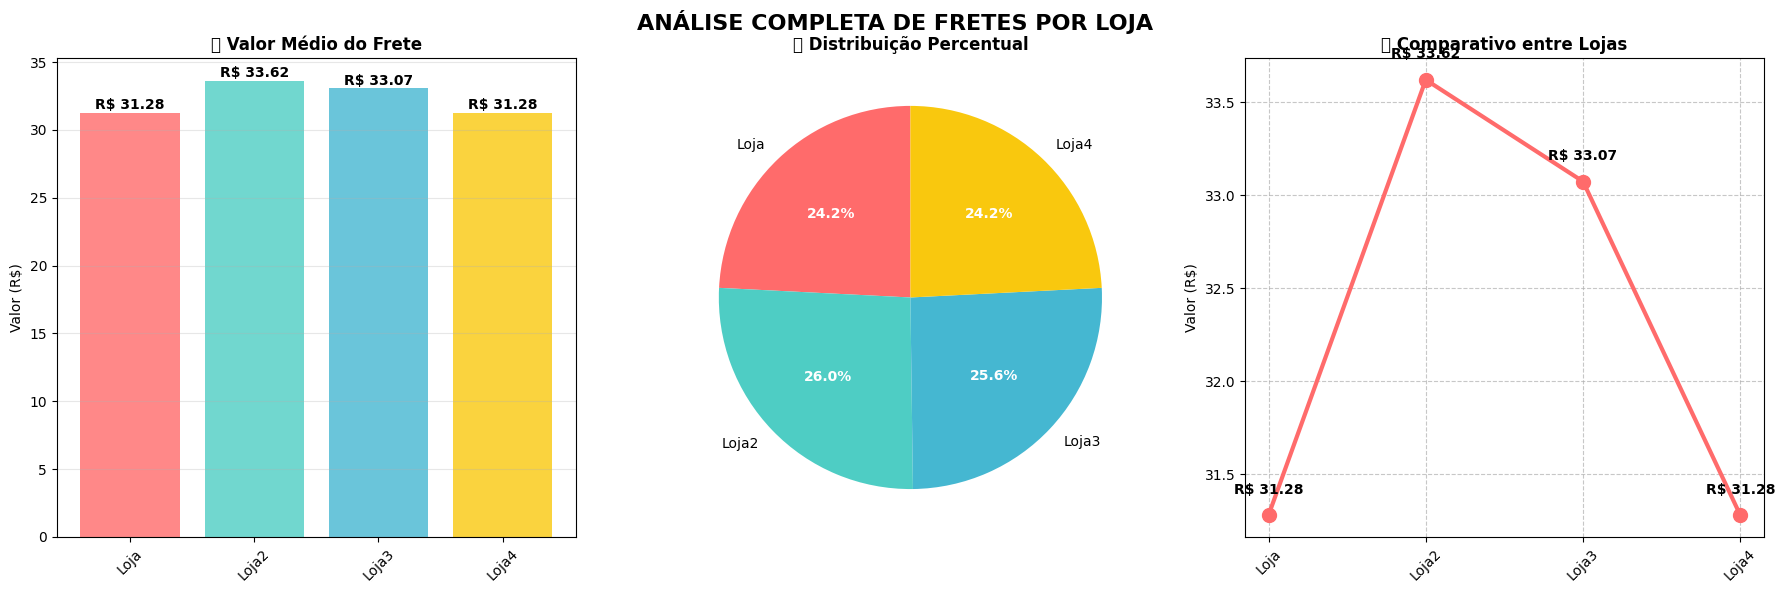


RELAT√ìRIO FINAL - M√âDIAS DE FRETE
üè™ Loja: R$ 31.28
üè™ Loja2: R$ 33.62
üè™ Loja3: R$ 33.07
üè™ Loja4: R$ 31.28

üìä Maior frete: R$ 33.62
üìä Menor frete: R$ 31.28
üìà Diferen√ßa: R$ 2.34


In [55]:
# CORRE√á√ÉO DA VARI√ÅVEL loja (SUBSTITUA PELA SUA CORRE√á√ÉO)
loja = loja4  # EXEMPLO - AJUSTE CONFORME SUA NECESSIDADE

# Dicion√°rio com bases corrigidas
bases = {
    "Loja": loja,        # AGORA CORRIGIDO
    "Loja2": loja2,
    "Loja3": loja3,
    "Loja4": loja4
}

# VERIFICA√á√ÉO FINAL
print("üîç VERIFICA√á√ÉO FINAL DAS BASES:")
print("-" * 40)
for nome, df in bases.items():
    if isinstance(df, pd.DataFrame) and not df.empty:
        print(f"‚úÖ {nome}: DataFrame v√°lido ({len(df)} registros)")
    else:
        print(f"‚ùå {nome}: Inv√°lido ou vazio")

print("-" * 40)

# 1. CALCULAR M√âDIAS DE FRETE PARA CADA LOJA
medias_frete = {}
for nome_loja, df in bases.items():
    try:
        if not df.empty and 'Frete' in df.columns:
            df['Frete'] = pd.to_numeric(df['Frete'], errors='coerce')
            media = df['Frete'].mean()
            medias_frete[nome_loja] = media
            print(f"‚úÖ {nome_loja}: R$ {media:.2f}")
        else:
            medias_frete[nome_loja] = 0
    except Exception as e:
        print(f"üí• Erro em {nome_loja}: {str(e)}")
        medias_frete[nome_loja] = 0

# Converter para DataFrame
df_medias = pd.DataFrame(list(medias_frete.items()), columns=['Loja', 'M√©dia_Frete'])
df_medias_valido = df_medias[df_medias['M√©dia_Frete'] > 0]

# 2. CRIAR OS 3 GR√ÅFICOS
if len(df_medias_valido) > 0:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('AN√ÅLISE COMPLETA DE FRETES POR LOJA', fontsize=16, fontweight='bold', y=0.98)

    # Gr√°fico 1: BARRAS
    cores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F9C80E']
    bars = ax1.bar(df_medias_valido['Loja'], df_medias_valido['M√©dia_Frete'],
                   color=cores[:len(df_medias_valido)], alpha=0.8)
    ax1.set_title('üì¶ Valor M√©dio do Frete', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Valor (R$)')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(axis='y', alpha=0.3)

    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                 f'R$ {height:.2f}', ha='center', va='bottom', fontweight='bold')

    # Gr√°fico 2: PIZZA
    wedges, texts, autotexts = ax2.pie(df_medias_valido['M√©dia_Frete'],
                                      labels=df_medias_valido['Loja'],
                                      autopct='%1.1f%%',
                                      colors=cores[:len(df_medias_valido)],
                                      startangle=90)
    ax2.set_title('ü•ß Distribui√ß√£o Percentual', fontsize=12, fontweight='bold')

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    # Gr√°fico 3: LINHAS
    ax3.plot(df_medias_valido['Loja'], df_medias_valido['M√©dia_Frete'],
             marker='o', linewidth=3, markersize=10, color='#FF6B6B')
    ax3.set_title('üìà Comparativo entre Lojas', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Valor (R$)')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(True, linestyle='--', alpha=0.7)

    for i, valor in enumerate(df_medias_valido['M√©dia_Frete']):
        ax3.text(i, valor + 0.1, f'R$ {valor:.2f}',
                ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

    # 3. RELAT√ìRIO FINAL
    print("\n" + "="*50)
    print("RELAT√ìRIO FINAL - M√âDIAS DE FRETE")
    print("="*50)
    for i, row in df_medias_valido.iterrows():
        print(f"üè™ {row['Loja']}: R$ {row['M√©dia_Frete']:.2f}")

    print(f"\nüìä Maior frete: R$ {df_medias_valido['M√©dia_Frete'].max():.2f}")
    print(f"üìä Menor frete: R$ {df_medias_valido['M√©dia_Frete'].min():.2f}")
    print(f"üìà Diferen√ßa: R$ {df_medias_valido['M√©dia_Frete'].max() - df_medias_valido['M√©dia_Frete'].min():.2f}")

else:
    print("‚ùå Nenhum dado v√°lido para gerar gr√°ficos")

# Relat√≥rio